In [147]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Import data

In [148]:
data=pd.read_csv('obesity_data.csv')
data.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


preprocessing data

In [149]:
#extract names of classes
data.ObesityCategory.unique()

array(['Normal weight', 'Obese', 'Overweight', 'Underweight'],
      dtype=object)

replace string label by integer 

In [150]:
Gender={'Male':0,'Female':1}
ObesityCategory={'Normal weight':0,'Obese':1,'Overweight':2,'Underweight':3}

data.Gender=[Gender[item] for item in data.Gender]
data.ObesityCategory=[ObesityCategory[item] for item in data.ObesityCategory]

split data to x and y

In [151]:
y=data.ObesityCategory
x=data[['Age',	'Gender'	,'Height',	'Weight',	'BMI',	'PhysicalActivityLevel'	]]

comparing distribution of samples by the features 

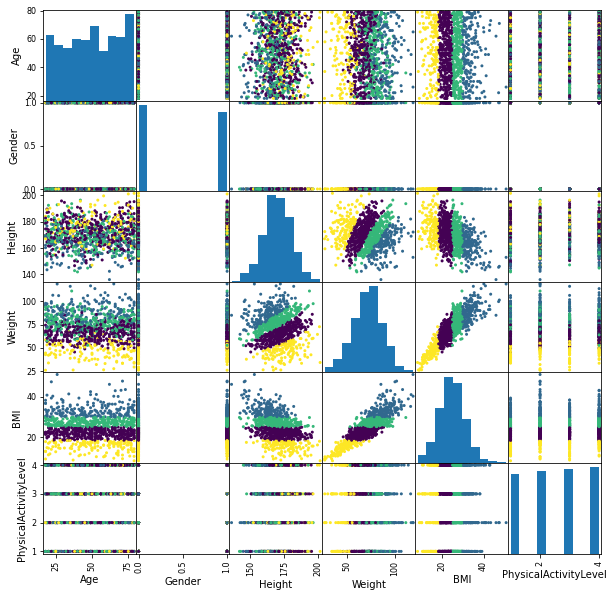

In [152]:
pd.plotting.scatter_matrix(x,alpha=1,c=y,figsize=(10,10))
plt.show()

make train and test datast

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [154]:
#check does classes distributed regular 
np.bincount(y_train)

array([260, 134, 206, 100], dtype=int64)

transform data to standard scale 

In [155]:
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

train model 

In [156]:
cl=LogisticRegression()
cl.fit(x_train,y_train)

LogisticRegression()

testing model

In [157]:
peredict =cl.predict(x_test)

In [158]:
accuracy_score(y_test,peredict)

0.9766666666666667

find which samples predict wrong 

In [159]:
incorrect_idx = np.where(peredict != y_test)[0]
print(incorrect_idx)

[ 15  79 111 119 144 203 277]


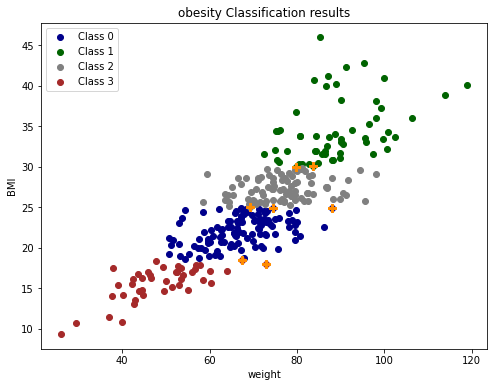

In [160]:
colors = ["darkblue", "darkgreen", "gray","brown"]
x_test=sc.inverse_transform(x_test) #for visual data in right scale 
for n, color in enumerate(colors):
   
    idx = np.where(y_test == n)[0]
    plt.scatter(x_test[idx, 3], x_test[idx, 4], color=color, label="Class %s" % str(n))

plt.scatter(x_test[incorrect_idx, 3], x_test[incorrect_idx, 4], color="darkorange",marker="P",s=80)

plt.xlabel('weight')
plt.ylabel('BMI')
plt.legend(loc=2)
plt.title("obesity Classification results")
plt.rcParams['figure.figsize'] = (8, 6)
plt.show()

# orange samples are wrong 